# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

### Revised version after review 01/17/17

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from __future__ import division
from sklearn.cross_validation import ShuffleSplit


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('c:/ndml/housing.csv')
prices = data['MEDV']                            # home prices are in this data set
features = data.drop('MEDV', axis = 1)           # features are in this data set
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
prices.count()

489

In [3]:
#features

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
# TODO: Minimum price of the data
minimum_price = None
minimum_price = prices.min()          # pandas method
#minimum_price = np.min(prices) # numpy method to get the same result
# similar: - np.max(prices), np.mean(prices), np.median(prices), np.std(prices)
print "Min using np ", np.min(prices)

# TODO: Maximum price of the data
maximum_price = None
maximum_price = prices.max()
print "Max using np",  np.max(prices)

# TODO: Mean price of the data
mean_price = None
mean_price = prices.mean()
print "Mean using np ",np.mean(prices)

# TODO: Median price of the data
median_price = None
median_price = prices.median()
print "Median using np ", np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = None
#std_price = prices.std()
std_price = prices.std(ddof=0) # added ddof=0 based on review to get STD values aligned with numpy results
print "SD using np ", np.std(prices)

# Show the calculated statistics - MIN, MAX, Mean, Median, SD - using pandas
print "\n Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)


#print "\n there is a difference in the Standard Deviation calculated by numpy vs. pandas! (the rest are same)"

Min using np  105000.0
Max using np 1024800.0
Mean using np  454342.944785
Median using np  438900.0
SD using np  165171.131544

 Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
1. The feature "RM" for Number of Rooms in a house can affect the price. 
    It is usually seen that the more rooms a house has the better price it commands in the market. 
    Of course there are other items such as the size of rooms, location of the property etc also affect the price.
    > An INCREASE in this value would generally indicate an INCREASE in home values.
    
2. The feature "LSTAT" refers to the percentage of lower income homeowners. 
    Generally the higher this is, it indicates a lower value neighbourhood. 
    This would reflect in a lower price of a property in such neighbourhoods. 
    > An INCREASE in this value would indicate a DECREASE in the value of homes. 
    
3. The feature "PTRATIO" refers to how many pupils are there to a given teacher. 
    In neighbourhoods with well funded schools  (meaning higher property taxes and higher proportion of those taxes budgeted for education), this ratio would low thus a better ratio. 
    Homes in such areas would command a higher price. A higher ratio would mean more pupils to a teacher which could indicate lack of funding or a large student population or both - a feature that higher networth home owners do not prefer.  
   > An INCREASE in this value would indicate a DECREASE in the home values. 

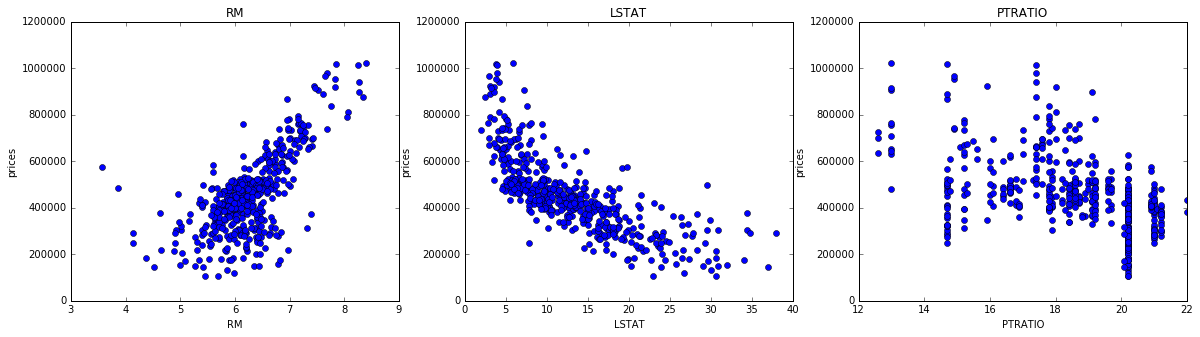

In [5]:
# Added plots based on review comments - to confirm visually the above observations!
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
  plt.subplot(1, 3, i+1)
  plt.plot(data[col], prices, 'o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')

# The plot of price vs features shows the correlation between them as per the discussion.

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    #score = None
    score = r2_score(y_true,y_predict)
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** 
The answer is 0.923 indicating the target can be predicated 92.3% by the model. The data supports this as most of the predicted values are very close to the true values.
This would mean the model is close to perfection in predicting. This could be a case of overfitting also as there seems to be a small amount of data.

Given this (small) set of data it looks like the variation has been captured to a good degree. More data would be able to predict this more accurately.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

print "cross checking if train test split was good"
print "No of entries in prices ", prices.count()
print "No of entries in features ", len(features)
print "No of entries in the training set ", len(X_train)
print "No of entries in the test set " ,len(X_test)
train_set_size = X_train.count()
test_set_size = X_test.count()
train_set_ratio = train_set_size/prices.count()
test_set_ratio = test_set_size/prices.count()
print "Train set ratio ", train_set_ratio, " - test set ratio ", test_set_ratio


Training and testing split was successful.
cross checking if train test split was good
No of entries in prices  489
No of entries in features  489
No of entries in the training set  391
No of entries in the test set  98
Train set ratio  RM         0.799591
LSTAT      0.799591
PTRATIO    0.799591
dtype: float64  - test set ratio  RM         0.200409
LSTAT      0.200409
PTRATIO    0.200409
dtype: float64


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

Machine learning simply stated is to train a model using data and then use this trained model to predict outcomes based on additional data. 

A model also needs to be tested (after being trained) so that its performance can be predictable. 

The amount of data that is used for training a model can drive the model's performance and its eventual predictability.

We can train a model with all the available data or with a sample of the data. 
Training with all data available would potentialy result in over fitting - so when new data is presented the model's prediction may be overly optimistic. This may not be desirable.
Also this results in testing on the same data not very realistic. 

The ideal approach is to split the data in some proportion into a training set and a test set. This would help in understanding how the model behaves (by measuring various metrics). The result of this approach would be that the accuracy of the model's performance on the test data would be a good indicator of its overall performance. 

It is good to test with a large amount of data (hoping this set would capture many variations) but we see 100% is not good so we use some ratio like 80/20 or 70/30 etc (the higher number indicates the size of the training set). 

By comparing the scores of performance over these 2 sets of data we can have a level of confidence in the model for new data. 

It is good practice to split the data into training and test sets. 


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

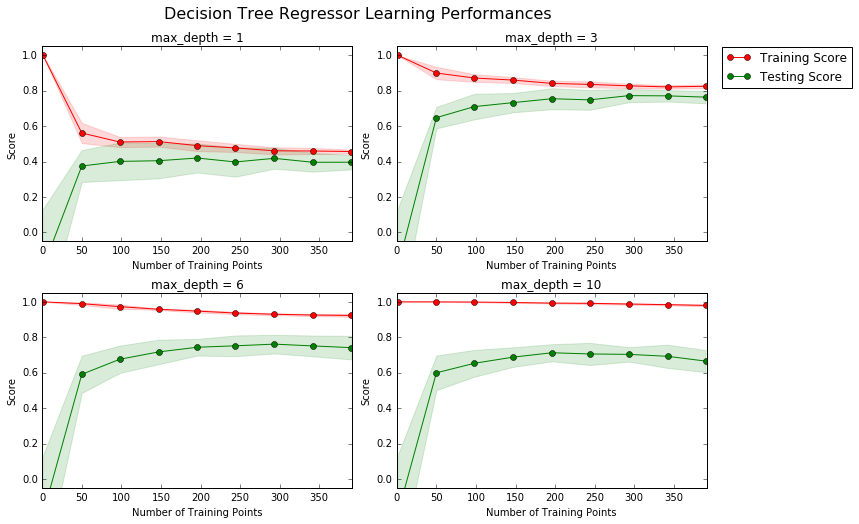

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
1. Looking at Depth =1 , we see the train and test scores are about 0.4. The testing score of around 0.4 seems to indicate a model that may not generalize (meaning given new datat it may not perform correctly) as expected. 
   Also with additional data (> 200) the scores level out which could indicate that the model can not improve with more data.
   So this model is biased - by exploring additional features the results may be better
   
2. At Depth = 3 we see the scores are trending towards desireable 1.0 and also are converging closer. Additional data may show an even better model. 

3. At Depth = 6 , we see good test and training scores but they are not converging closer. This not the ideal depth. 

4. At Depth = 10, we see the training score get better whereas the testing score seems to level out about 0.7. So this model also seems to be not ideal.

** Observation **

A. Based on the above it seems a depth between 3 and 6 may come close to the ideal model. 

B. It looks like of the displayed Depths, Depth = 3 may be closest to the ideal BUT it would be good to lower the testing scores further. 

C. That would mean a depth = 4 or 5. Further analysis is needed to decide on the correct depth.

D. At smaller data set sizes, the model may optimize quickly and - this can be seen that, when the Training Points increase beyond a certain point,  there is small magnitude of change in the scores. It looks like above 200 points the scores start to "level off" or plateau. Therefore addition of more data may not be much more effective. This tells us that the model had "learnt" to interpret the data to a large extent by the time it has gone throgh 200+ training points. 

** Conclusion ** I would estimate a Depth of 4 or 5 to be ideal. 



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

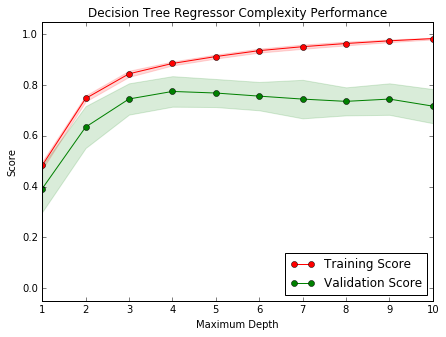

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

    As discussed above at a Depth of 1 the model shows high bias (low scores indicating high error rates) and at Depth = 10   it shows high variance (shown by the large gap between the scores).

    Reviewing the complexity graph above it seems that from about Depth = 4 the scores diverge which is not ideal. So it may be that a model of Depth = 4 may be the ideal model. 
    
    (We had seen the ideal depth could be 4 or 5 - this complexity curve helps us pick one (4))

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** 

I think with the analysis done so far a Depth of 4 would generalize the data best. It can be seen that at this point the test score starts to level off and the gap between test and train scores seems optimal. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*



**Answer: **

Grid search utilizes a grid of parameters to be searched using K-fold cross-validation. It is used to determine the best parameter for a classifier. The method works by using all possible combinations of parameters and then comparing the model scores. The set of parameters that delivers the best score would be the optimal one.


{Official definition from course material :GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. The beauty is that it can work through many combinations in only a couple extra lines of code.}

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

In 'Train Test split' method we used our data split into 2 sets - one for training and one for testing. The model was evaluated using these 2 sets just once. 

In K-fold cross-validation the data is randomly split into "K" sets of equal size. These sets are called folds. 

Each fold then is used as a test set once with the rest of the data used as the training set. This process is repeated K times. This results in each data point being in the test set once and the in the training set k-1 times. 
The performance score of each of each trial then is averaged. The performance of each combination of train/test is then compared with all other scores to arrive at the optimal model. 


** Advantages over train/test split **

This is an improvement over using a simple train/test split because the data is randomly varied in K-fold process. This effectively reduces the variance of a single trial  on one test/train split.

By using k fold technique for cross validation and using grid search on the cross validated set, we can expect the data to generalize better. Otherwise grid search may produce a model with parameters that are generally good for some particular score but may not result in a generalized model.  There is a possibility that overfitting could occur.

** note **

One thing to be noted - K fold does not perform well if the data is ordered in some fashion - this would make the data grouped into similar sets when split. 




### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [11]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = None
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {}
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    #scoring_fnc = None
    scoring_fnc = make_scorer(performance_metric)
    # TODO: Create the grid search object
    #grid = None
    grid = GridSearchCV(regressor,params,cv=cv_sets,scoring=scoring_fnc)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

    The model has selected 4 as the max depth for the model. This concurs with the analysis and reasoning presented above. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [13]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
    
print "\n statistical data (from previous steps) for comparision and review \n"

print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67

 statistical data (from previous steps) for comparision and review 

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


**Answer: **
The analysis suggests the following prices for homes, base on client requirements:

    1. Client 1 - $391,183 (5 rooms, 17% poverty level, 15 to 1 PT Ratio) - below mean and median, closer to mean
    
    2. Client 2 - $189,123 (4 rooms, 32% poverty level, 22 to 1 PT Ratio) - below mean and median, closer to minimum
    
    3. Client 3 - $942,666 (8 rooms, 3%  poverty level, 12 to 1 PT Ratio) - above mean and median, closer to maximum
    
As can be seen our initial hypotheses the selected features (Feature Observation) do influence the price as expected!

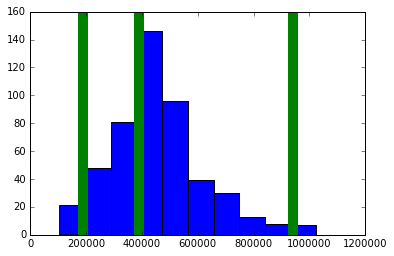

In [14]:
# trying to visualize
import matplotlib.pyplot as plt
plt.hist (prices, bins = 10)
for price in reg.predict(client_data):
    plt.axvline(price,lw=10, c='g')

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
1. Today (2016-17) the data from 1978 may be not relevant. In the span of over nearly 5 decades the population (demographics) would have changed significantly. For example it has been seen that many US cities have lost downtown populations as people move to the suburbs. Also economic parameters have significantly changed - from an industrial society of tht '70s to the information technology society of now the overall finanicial picture has changed - there are more poor in the urban areas than the suburbs. This has lead to higher PT Ratios even in higher tax areas.
2. Boston vs rural city - this is an interesting aspect because with all the suburban movement the definition of "rural" may have to be revisited. But it is possible to say that data from an urban center may not apply directly to a rural city unless many more relevant features are taken in to consideration. 
3. This analysis uses 3 features out of the larger set of features. Some parameters as to the location, schools information and age of the property (year built) etc will also influence the price. Addition of other features such as CRIM (crime rate), DIS (weighted distances to employment hubs) and TAX (property tax rates) could give us a better picture of the pricing. 
4. The model seems to be good enough for the given data. But the Sensitivity analysis above shows a good degree of variance which may indicate that it may not be a robust model. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.